# Read all log.txt

In [1]:
import glob
import pandas as pd
from pandas.core.common import flatten
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = "D:/Dev/ReinforcementLearning/results/CartPole-v1/"

In [3]:
logs = glob.glob(path + "/*/*/*.txt")

In [4]:
def read_file(path):
    values = []
    col = path.split("\\")[-2].split("_")
           
    with open(path, "r") as file:
        for i in file.readlines():
            values.append([path.split("\\")[-3],*col,*i.split("\n")[0].split(",")])
    return values

In [5]:
columns = ["algo","step_train","batch_size", "gamma", "greedy_exploration","network","", "optimizer", "lr", "memories", "max_size", "TD_gamma", "step", "max", "min", "avg", "sum"]

In [6]:
df = pd.DataFrame([], columns = columns)
for file in logs:
    ite = pd.DataFrame(read_file(file), columns = columns)
    df = pd.concat([df,ite],  ignore_index=True)

In [7]:
df.drop(columns=["max","min","avg"], inplace=True)

# Result

In [8]:
df.head(10)

,algo,step_train,batch_size,gamma,greedy_exploration,network,,optimizer,lr,memories,max_size,TD_gamma,step,sum
0,DQN,1,32,1.0,EpsilonGreedy-0.1,SimpleDuelingNetwork,,Adam,0.0001,ExperienceReplay,2048,0,1,10.0
1,DQN,1,32,1.0,EpsilonGreedy-0.1,SimpleDuelingNetwork,,Adam,0.0001,ExperienceReplay,2048,0,10,9.0
2,DQN,1,32,1.0,EpsilonGreedy-0.1,SimpleDuelingNetwork,,Adam,0.0001,ExperienceReplay,2048,0,20,9.0
3,DQN,1,32,1.0,EpsilonGreedy-0.1,SimpleDuelingNetwork,,Adam,0.0001,ExperienceReplay,2048,0,30,10.0
4,DQN,1,32,1.0,EpsilonGreedy-0.1,SimpleDuelingNetwork,,Adam,0.0001,ExperienceReplay,2048,0,40,10.0
5,DQN,1,32,1.0,EpsilonGreedy-0.1,SimpleDuelingNetwork,,Adam,0.0001,ExperienceReplay,2048,0,50,9.0
6,DQN,1,32,1.0,EpsilonGreedy-0.1,SimpleDuelingNetwork,,Adam,0.0001,ExperienceReplay,2048,0,60,10.0
7,DQN,1,32,1.0,EpsilonGreedy-0.1,SimpleDuelingNetwork,,Adam,0.0001,ExperienceReplay,2048,0,70,8.0
8,DQN,1,32,1.0,EpsilonGreedy-0.1,SimpleDuelingNetwork,,Adam,0.0001,ExperienceReplay,2048,0,80,11.0
9,DQN,1,32,1.0,EpsilonGreedy-0.1,SimpleDuelingNetwork,,Adam,0.0001,ExperienceReplay,2048,0,90,9.0


## Sort by sum and step

In [9]:
for c in ["step_train", "batch_size", "gamma", "lr", "step", "sum", "TD_gamma"]:
    df[c] = df[c].astype(float)
for c in df.columns:
    if df[c].dtypes  == "object":
        df[c] = df[c].astype('category')

In [10]:
df.sort_values(by =["sum","step"],  ascending = [False, True]).head(10)

,algo,step_train,batch_size,gamma,greedy_exploration,network,,optimizer,lr,memories,max_size,TD_gamma,step,sum
1683,DQN,1.0,32.0,1.0,EpsilonGreedy-0.6,SimpleNetwork,,Adam,0.100,ExperienceReplay,512,0.0,50.0,500.0
1436,DQN,1.0,32.0,1.0,EpsilonGreedy-0.6,SimpleNetwork,,Adam,0.001,ExperienceReplay,2048,0.0,60.0,500.0
1125,DQN,1.0,32.0,1.0,EpsilonGreedy-0.6,SimpleDuelingNetwork,,Adam,0.001,ExperienceReplay,2048,0.0,90.0,500.0
1160,DQN,1.0,32.0,1.0,EpsilonGreedy-0.6,SimpleDuelingNetwork,,Adam,0.001,ExperienceReplay,512,0.0,90.0,500.0
1126,DQN,1.0,32.0,1.0,EpsilonGreedy-0.6,SimpleDuelingNetwork,,Adam,0.001,ExperienceReplay,2048,0.0,100.0,500.0
1440,DQN,1.0,32.0,1.0,EpsilonGreedy-0.6,SimpleNetwork,,Adam,0.001,ExperienceReplay,2048,0.0,100.0,500.0
848,DQN,1.0,32.0,1.0,EpsilonGreedy-0.1,SimpleNetwork,,Adam,0.001,ExperienceReplay,512,0.0,110.0,500.0
1162,DQN,1.0,32.0,1.0,EpsilonGreedy-0.6,SimpleDuelingNetwork,,Adam,0.001,ExperienceReplay,512,0.0,110.0,500.0
849,DQN,1.0,32.0,1.0,EpsilonGreedy-0.1,SimpleNetwork,,Adam,0.001,ExperienceReplay,512,0.0,120.0,500.0
1163,DQN,1.0,32.0,1.0,EpsilonGreedy-0.6,SimpleDuelingNetwork,,Adam,0.001,ExperienceReplay,512,0.0,120.0,500.0


## Correlation matrix

In [11]:
df_corr = df.copy()

In [12]:
for c in df_corr.columns:
    try:
        df_corr[c] = df_corr[c].cat.codes
    except:
        pass

In [13]:
df_corr.corr()["sum"]

algo                       NaN
step_train                 NaN
batch_size                 NaN
gamma                      NaN
greedy_exploration    0.258098
network               0.033773
                           NaN
optimizer                  NaN
lr                   -0.182324
memories                   NaN
max_size              0.023941
TD_gamma             -0.359880
step                  0.127479
sum                   1.000000
Name: sum, dtype: float64

<AxesSubplot:>

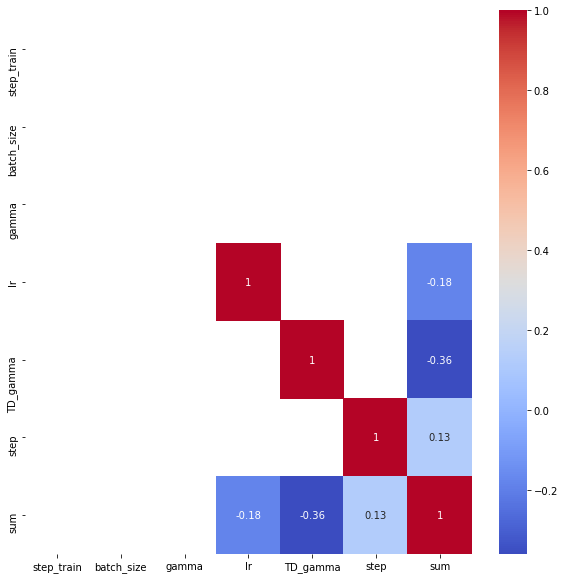

In [14]:
fig, ax = plt.subplots(figsize=(10,10))      
sns.heatmap(df.corr()[abs(df.corr()) > 0.05], annot = True, fmt='.2g',cmap= 'coolwarm', ax=ax)

## Correlation matrix for best result

In [15]:
df_corr_best = df_corr[df_corr["sum"] >= 300]

<AxesSubplot:>

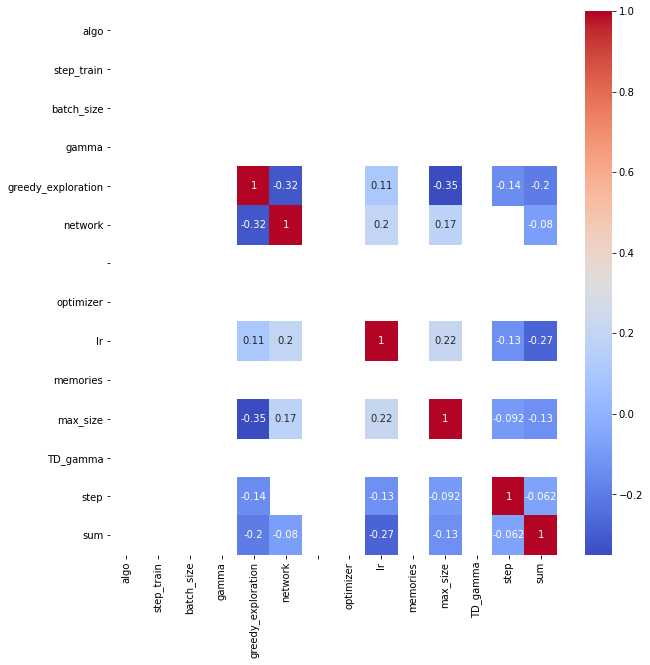

In [16]:
fig, ax = plt.subplots(figsize=(10,10))      
sns.heatmap(df_corr_best.corr()[abs(df_corr_best.corr()) > 0.05], annot = True, fmt='.2g',cmap= 'coolwarm', ax=ax)

# Result by algo

### DQN

#### SimpleNetwork

In [17]:
df_DQN = df[df["algo"] == "DQN"].copy()
df_DQN = df_DQN[df_DQN["network"] == "SimpleNetwork"]

In [18]:
df_DQN.sort_values(by =["sum","step"],  ascending = [False, True]).head(50)

,algo,step_train,batch_size,gamma,greedy_exploration,network,,optimizer,lr,memories,max_size,TD_gamma,step,sum
1683,DQN,1.0,32.0,1.0,EpsilonGreedy-0.6,SimpleNetwork,,Adam,0.100,ExperienceReplay,512,0.0,50.0,500.0
1436,DQN,1.0,32.0,1.0,EpsilonGreedy-0.6,SimpleNetwork,,Adam,0.001,ExperienceReplay,2048,0.0,60.0,500.0
1440,DQN,1.0,32.0,1.0,EpsilonGreedy-0.6,SimpleNetwork,,Adam,0.001,ExperienceReplay,2048,0.0,100.0,500.0
848,DQN,1.0,32.0,1.0,EpsilonGreedy-0.1,SimpleNetwork,,Adam,0.001,ExperienceReplay,512,0.0,110.0,500.0
849,DQN,1.0,32.0,1.0,EpsilonGreedy-0.1,SimpleNetwork,,Adam,0.001,ExperienceReplay,512,0.0,120.0,500.0
1442,DQN,1.0,32.0,1.0,EpsilonGreedy-0.6,SimpleNetwork,,Adam,0.001,ExperienceReplay,2048,0.0,120.0,500.0
1506,DQN,1.0,32.0,1.0,EpsilonGreedy-0.6,SimpleNetwork,,Adam,0.001,ExperienceReplay,512,0.0,140.0,500.0
1447,DQN,1.0,32.0,1.0,EpsilonGreedy-0.6,SimpleNetwork,,Adam,0.001,ExperienceReplay,2048,0.0,170.0,500.0
1509,DQN,1.0,32.0,1.0,EpsilonGreedy-0.6,SimpleNetwork,,Adam,0.001,ExperienceReplay,512,0.0,170.0,500.0
1450,DQN,1.0,32.0,1.0,EpsilonGreedy-0.6,SimpleNetwork,,Adam,0.001,ExperienceReplay,2048,0.0,200.0,500.0


<AxesSubplot:>

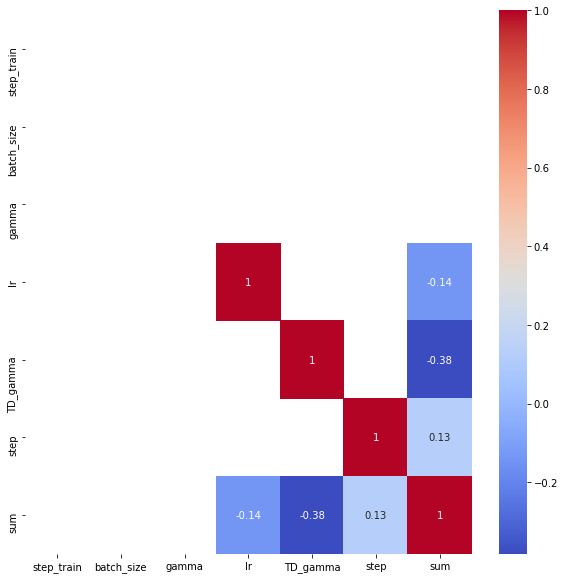

In [19]:
fig, ax = plt.subplots(figsize=(10,10))      
sns.heatmap(df_DQN.corr()[abs(df_DQN.corr()) > 0.05], annot = True, fmt='.2g',cmap= 'coolwarm', ax=ax)

In [20]:
columns = ["algo","step_train","batch_size","gamma","greedy_exploration","network","optimizer","lr","memories","max_size","TD_gamma"]
df_DQN[df_DQN["sum"] >= 500].groupby(by=columns, observed=True).count().sort_values(by=['sum'], ascending=False)

\
algo step_train batch_size gamma greedy_exploration network       optimizer lr    memories         max_size TD_gamma       
DQN  1.0        32.0       1.0   EpsilonGreedy-0.1  SimpleNetwork Adam      0.001 ExperienceReplay 512      0.0       11   
                                 EpsilonGreedy-0.6  SimpleNetwork Adam      0.001 ExperienceReplay 2048     0.0       11   
                                                                                                   512      0.0        4   
                                                                            0.100 ExperienceReplay 512      0.0        1   

                                                                                                                      step  \
algo step_train batch_size gamma greedy_exploration network       optimizer lr    memories         max_size TD_gamma         
DQN  1.0        32.0       1.0   EpsilonGreedy-0.1  SimpleNetwork Adam      0.001 ExperienceReplay 512      0.0         11   
                                 EpsilonGreedy-0.6  SimpleNetwork Adam      0.001 ExperienceReplay 2048     0.0         11   
                                                                                                   512      0.0          4   
                                                                            0.100 ExperienceReplay 512      0.0          1   

                                                                                                                      sum  
algo step_train batch_size gamma greedy_exploration network       optimizer lr    memories         max_size TD_gamma       
DQN  1.0        32.0       1.0   EpsilonGreedy-0.1  SimpleNetwork Adam      0.001 ExperienceReplay 512      0.0        11  
                                 EpsilonGreedy-0.6  SimpleNetwork Adam      0.001 ExperienceReplay 2048     0.0        11  
                                                                                                   512      0.0         4  
                                                                            0.100 ExperienceReplay 512      0.0         1

#### DuelingNetwork

In [21]:
df_DQN = df[df["algo"] == "DQN"].copy()
df_DQN = df_DQN[df_DQN["network"] == "SimpleDuelingNetwork"]

In [22]:
df_DQN.sort_values(by =["sum","step"],  ascending = [False, True]).head(20)

,algo,step_train,batch_size,gamma,greedy_exploration,network,,optimizer,lr,memories,max_size,TD_gamma,step,sum
1125,DQN,1.0,32.0,1.0,EpsilonGreedy-0.6,SimpleDuelingNetwork,,Adam,0.001,ExperienceReplay,2048,0.0,90.0,500.0
1160,DQN,1.0,32.0,1.0,EpsilonGreedy-0.6,SimpleDuelingNetwork,,Adam,0.001,ExperienceReplay,512,0.0,90.0,500.0
1126,DQN,1.0,32.0,1.0,EpsilonGreedy-0.6,SimpleDuelingNetwork,,Adam,0.001,ExperienceReplay,2048,0.0,100.0,500.0
1162,DQN,1.0,32.0,1.0,EpsilonGreedy-0.6,SimpleDuelingNetwork,,Adam,0.001,ExperienceReplay,512,0.0,110.0,500.0
1163,DQN,1.0,32.0,1.0,EpsilonGreedy-0.6,SimpleDuelingNetwork,,Adam,0.001,ExperienceReplay,512,0.0,120.0,500.0
1130,DQN,1.0,32.0,1.0,EpsilonGreedy-0.6,SimpleDuelingNetwork,,Adam,0.001,ExperienceReplay,2048,0.0,140.0,500.0
1165,DQN,1.0,32.0,1.0,EpsilonGreedy-0.6,SimpleDuelingNetwork,,Adam,0.001,ExperienceReplay,512,0.0,140.0,500.0
1167,DQN,1.0,32.0,1.0,EpsilonGreedy-0.6,SimpleDuelingNetwork,,Adam,0.001,ExperienceReplay,512,0.0,160.0,500.0
1170,DQN,1.0,32.0,1.0,EpsilonGreedy-0.6,SimpleDuelingNetwork,,Adam,0.001,ExperienceReplay,512,0.0,190.0,500.0
1136,DQN,1.0,32.0,1.0,EpsilonGreedy-0.6,SimpleDuelingNetwork,,Adam,0.001,ExperienceReplay,2048,0.0,200.0,500.0


<AxesSubplot:>

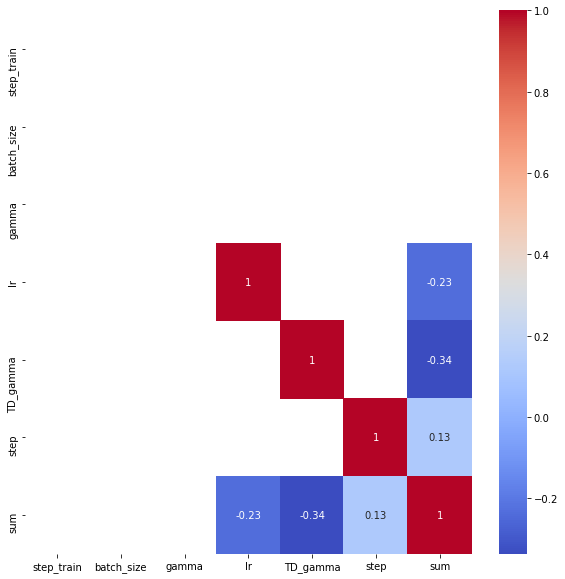

In [23]:
fig, ax = plt.subplots(figsize=(10,10))      
sns.heatmap(df_DQN.corr()[abs(df_DQN.corr()) > 0.05], annot = True, fmt='.2g',cmap= 'coolwarm', ax=ax)

In [24]:
columns = ["algo","step_train","batch_size","gamma","greedy_exploration","network","optimizer","lr","memories","max_size","TD_gamma"]
df_DQN[df_DQN["sum"] >= 500].groupby(by=columns, observed=True).count().sort_values(by=['sum'], ascending=False)

\
algo step_train batch_size gamma greedy_exploration network              optimizer lr    memories         max_size TD_gamma       
DQN  1.0        32.0       1.0   EpsilonGreedy-0.6  SimpleDuelingNetwork Adam      0.001 ExperienceReplay 2048     0.0       13   
                                                                                                          512      0.0        8   

                                                                                                                             step  \
algo step_train batch_size gamma greedy_exploration network              optimizer lr    memories         max_size TD_gamma         
DQN  1.0        32.0       1.0   EpsilonGreedy-0.6  SimpleDuelingNetwork Adam      0.001 ExperienceReplay 2048     0.0         13   
                                                                                                          512      0.0          8   

                                                                                                                             sum  
algo step_train batch_size gamma greedy_exploration network              optimizer lr    memories         max_size TD_gamma       
DQN  1.0        32.0       1.0   EpsilonGreedy-0.6  SimpleDuelingNetwork Adam      0.001 ExperienceReplay 2048     0.0        13  
                                                                                                          512      0.0         8

### DoubleDQN

#### SimpleNetwork

In [25]:
df_DoubleDQN = df[df["algo"] == "DoubleDQN"].copy()
df_DoubleDQN = df_DoubleDQN[df_DoubleDQN["network"] == "SimpleNetwork"]

In [26]:
df_DoubleDQN.sort_values(by =["sum","step"],  ascending = [False, True]).head(10)

,algo,step_train,batch_size,gamma,greedy_exploration,network,,optimizer,lr,memories,max_size,TD_gamma,step,sum


<AxesSubplot:>

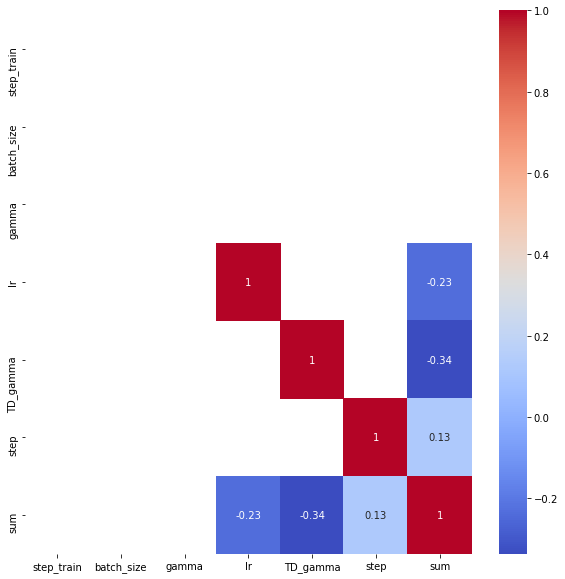

In [27]:
fig, ax = plt.subplots(figsize=(10,10))      
sns.heatmap(df_DQN.corr()[abs(df_DQN.corr()) > 0.05], annot = True, fmt='.2g',cmap= 'coolwarm', ax=ax)

In [28]:
columns = ["algo","step_train","batch_size","gamma","greedy_exploration","network","optimizer","lr","memories","max_size","TD_gamma"]
df_DoubleDQN[df_DoubleDQN["sum"] >= 500].groupby(by=columns, observed=True).count().sort_values(by=['sum'], ascending=False)

,,,,,,,,,,,,step,sum
algo,step_train,batch_size,gamma,greedy_exploration,network,optimizer,lr,memories,max_size,TD_gamma,,,


#### DuelingNetwork

In [29]:
df_DoubleDQN = df[df["algo"] == "DoubleDQN"].copy()
df_DoubleDQN = df_DoubleDQN[df_DoubleDQN["network"] == "SimpleDuelingNetwork"]

In [30]:
df_DoubleDQN.sort_values(by =["sum","step"],  ascending = [False, True]).head(10)

,algo,step_train,batch_size,gamma,greedy_exploration,network,,optimizer,lr,memories,max_size,TD_gamma,step,sum


D:\Users\nathan\Anaconda3\envs\cpmt\lib\site-packages\seaborn\matrix.py:204: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
D:\Users\nathan\Anaconda3\envs\cpmt\lib\site-packages\seaborn\matrix.py:209: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


<AxesSubplot:>

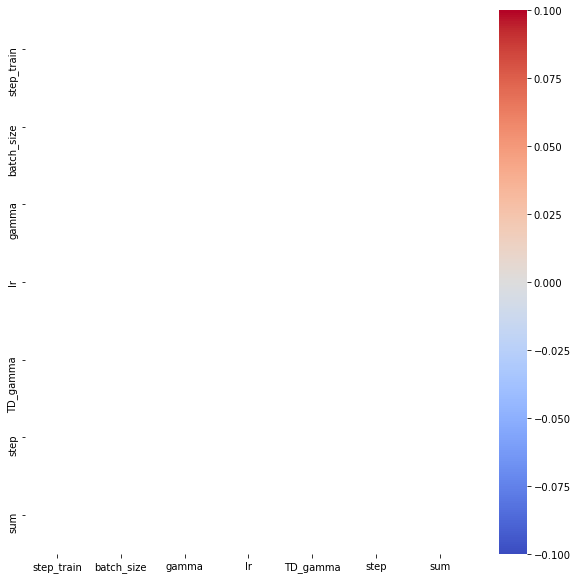

In [31]:
fig, ax = plt.subplots(figsize=(10,10))      
sns.heatmap(df_DoubleDQN.corr()[abs(df_DoubleDQN.corr()) > 0.05], annot = True, fmt='.2g',cmap= 'coolwarm', ax=ax)

In [32]:
columns = ["algo","step_train","batch_size","gamma","greedy_exploration","network","optimizer","lr","memories","max_size","TD_gamma"]
df_DoubleDQN[df_DoubleDQN["sum"] >= 500].groupby(by=columns, observed=True).count().sort_values(by=['sum'], ascending=False)

,,,,,,,,,,,,step,sum
algo,step_train,batch_size,gamma,greedy_exploration,network,optimizer,lr,memories,max_size,TD_gamma,,,


### CategoricalDQN

In [33]:
df_CategoricalDQN = df[df["algo"] == "CategoricalDQN"].copy()

In [34]:
df_CategoricalDQN.sort_values(by =["sum","step"],  ascending = [False, True]).head(20)

,algo,step_train,batch_size,gamma,greedy_exploration,network,,optimizer,lr,memories,max_size,TD_gamma,step,sum


D:\Users\nathan\Anaconda3\envs\cpmt\lib\site-packages\seaborn\matrix.py:204: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
D:\Users\nathan\Anaconda3\envs\cpmt\lib\site-packages\seaborn\matrix.py:209: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


<AxesSubplot:>

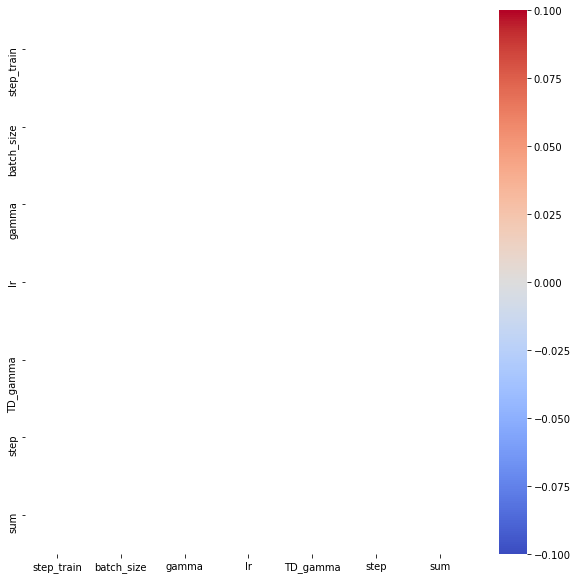

In [35]:
fig, ax = plt.subplots(figsize=(10,10))      
sns.heatmap(df_CategoricalDQN.corr()[abs(df_CategoricalDQN.corr()) > 0.05], annot = True, fmt='.2g',cmap= 'coolwarm', ax=ax)

In [36]:
columns = ["algo","step_train","batch_size","gamma","greedy_exploration","network","optimizer","lr","memories","max_size","TD_gamma"]
df_CategoricalDQN[df_CategoricalDQN["sum"] >= 500].groupby(by=columns).count().sort_values(by=['sum'], ascending=False)

,,,,,,,,,,,,step,sum
algo,step_train,batch_size,gamma,greedy_exploration,network,optimizer,lr,memories,max_size,TD_gamma,,,
